In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [5]:
data = pd.read_csv('~/input/data/train/ner_train_ver2.tsv', sep='\t')
data.head()

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 @ α ARTIFACT α 자동차@의 브랜드로는 ...,랜드로버,자동차,17
1,선거에서 # β ORGANIZATION β 민주당#은 해산 전 의석인 230석에 한...,민주당,27석,0
2,# β ORGANIZATION β 유럽 축구 연맹#(@ α ORGANIZATION ...,유럽 축구 연맹,UEFA,6
3,용병 @ α CIVILIZATION α 공격수@ 챠디의 부진과 시즌 초 활약한 # ...,강수일,공격수,2
4,# β LOCATION β 람캄행# 왕은 1237년에서 1247년 사이 수코타이의 ...,람캄행,퍼쿤 씨 인트라팃,8


In [7]:
unique_data = data['label'].unique()
unique_data

array([17,  0,  6,  2,  8,  3, 10,  4, 16, 20,  7, 15,  5, 25, 39, 19, 34,
       13, 35, 30, 11,  9, 27,  1, 24, 22, 21, 14, 31, 33, 12, 23, 32, 18,
       38, 26, 37, 29, 36, 28, 41, 40])

In [9]:
label_num_counter = {}
for k in unique_data:
    label_num_counter[k] = len(data[data['label']==k])
label_num_counter

{17: 165,
 0: 4441,
 6: 231,
 2: 553,
 8: 164,
 3: 44,
 10: 815,
 4: 679,
 16: 23,
 20: 136,
 7: 209,
 15: 335,
 5: 186,
 25: 52,
 39: 9,
 19: 4,
 34: 15,
 13: 11,
 35: 27,
 30: 12,
 11: 58,
 9: 115,
 27: 36,
 1: 92,
 24: 103,
 22: 56,
 21: 84,
 14: 45,
 31: 15,
 33: 67,
 12: 45,
 23: 80,
 32: 26,
 18: 7,
 38: 18,
 26: 8,
 37: 3,
 29: 5,
 36: 11,
 28: 9,
 41: 5,
 40: 1}

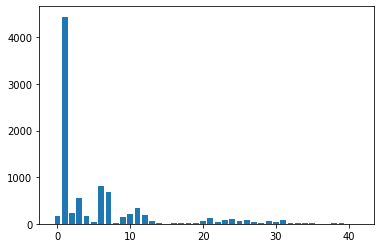

In [10]:
label_num = label_num_counter.values()

x = np.arange(len(label_num))
plt.bar(x, label_num)
plt.show()

In [11]:
train_data = pd.DataFrame()
validation_data = pd.DataFrame()
for k in unique_data:
    temp_data = data[data['label']==k]
    validation_data = validation_data.append(temp_data[:len(temp_data)//5])
    train_data = train_data.append(temp_data[len(temp_data)//5:])

train_data = train_data.sample(frac=1).reset_index(drop=True)
validation_data = validation_data.sample(frac=1).reset_index(drop=True)

print(len(train_data) + len(validation_data))

train_data.head()
validation_data.head()

9000


,sentence,entity_01,entity_02,label
0,이로써 드림웍스의 모든 사업군이 @ α ORGANIZATION α 컴캐스트@의 자회...,드림웍스,컴캐스트,3
1,2013년 7월 4일 교황 @ α PERSON α 프란치스코@는 공식적으로 # β ...,요한 바오로 2세,프란치스코,0
2,그리고 @ α ARTIFACT α 리그 오브 레전드@ 월드 챔피언십 2018에서 K...,아프리카 프릭스,리그 오브 레전드,15
3,그가 공식적인 데뷔를 한 것은 # β O β 조#@ α CIVILIZATION α ...,조,PD,2
4,@ α ARTIFACT α 영웅문@은 인터넷 증권사 # β ORGANIZATION ...,키움증권,영웅문,17


In [13]:
train_data.to_csv('~/input/data/train/new_train_ner.tsv', sep='\t', header = True, index = False)
validation_data.to_csv('~/input/data/train/val_train_ner.tsv', sep='\t', header = True, index = False)